dependances

In [54]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as pp

files impelemenation

In [55]:
data_path='data_sets/multiple_linear_regression_dataset.csv'

if os.path.exists(data_path):
    print('file exists')
    print('importing file')
    data=pd.read_csv(data_path)
    print('done importing')

else:
    print("file doesn't exist")
    exit()
    

file exists
importing file
done importing


data manipulation

In [56]:
training_data=np.array(data).T
m,n=data.shape

input_matrix=training_data[0:3,:]
real_salary=training_data[3,:]

functions implementation

In [57]:
def prams_init():
    return np.random.rand(1,3)

def forward(weight_vector,inputt):
   return weight_vector.dot(inputt)

def loss_function(expected_salary,real_salary):
    return np.sum(np.square(expected_salary-real_salary))

def gradient(expected_salary,real_salary,input_matrix):

    gradient_phi_0=np.sum(2*(expected_salary-real_salary))
    gradient_phi_1=np.sum(2*input_matrix[1,:]*(expected_salary-real_salary))
    gradient_phi_2=np.sum(2*input_matrix[2,:]*(expected_salary-real_salary))

    return np.array([gradient_phi_0,gradient_phi_1,gradient_phi_2])
    
def prams_update(weight_vector,gradient_vector,alpha):
     return weight_vector-alpha*gradient_vector    


training code

In [58]:
weight_vector= prams_init()
alpha = 0.000005
iterations = 1000000

loss_history=[]
weight_history=[]
weight_history.append(weight_vector)

for i in range(iterations):
    expected_salary = forward(weight_vector,input_matrix)
    loss = loss_function(expected_salary,real_salary)
    loss_history.append(loss)
    gradient_vector= gradient(expected_salary,real_salary, input_matrix)
    gradient_vector.shape
    weight_vector = prams_update(weight_vector,gradient_vector,alpha)
    weight_history.append(weight_vector)


weight_history_vectors=np.array(weight_history).T

weights optimized values

In [50]:
weight_vector


array([[31260.87828864,   -99.17339368,  2162.38772958]])

model performance (Loss over Iterations)

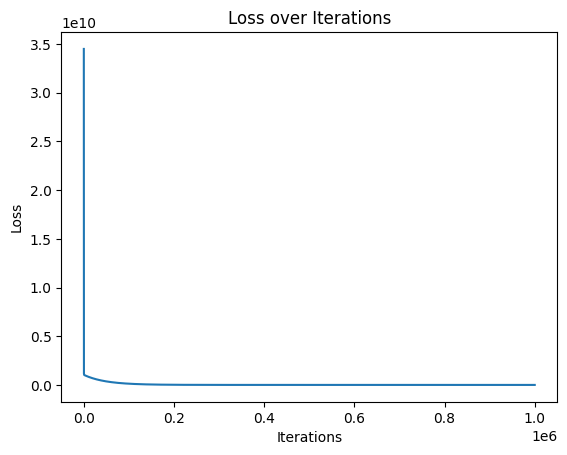

In [51]:
pp.plot(range(iterations), loss_history)
pp.xlabel('Iterations')
pp.ylabel('Loss')
pp.title('Loss over Iterations')
pp.show()

model performance (Loss over phi_0)

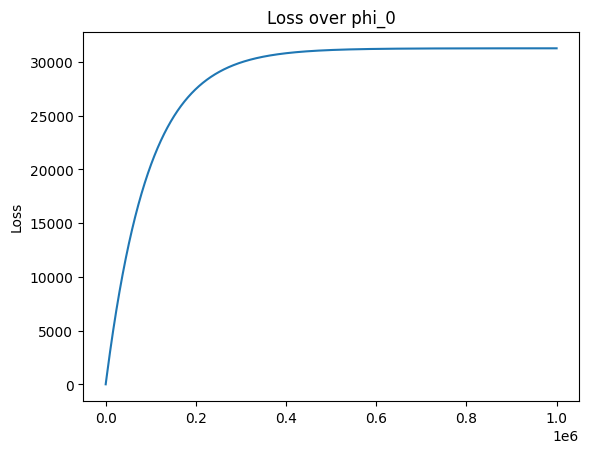

In [52]:
pp.plot(range(iterations+1),weight_history_vectors[0,0,:])
pp.xlabel('')
pp.ylabel('Loss')
pp.title('Loss over phi_0')
pp.show()

model performance (Loss over phi_1)

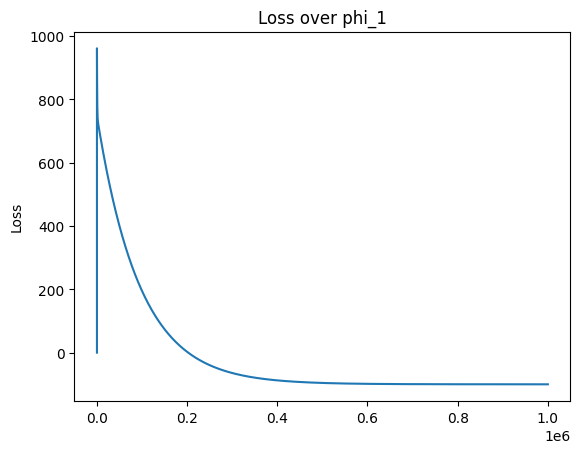

In [53]:
pp.plot(range(iterations+1),weight_history_vectors[1,0,:])
pp.xlabel('')
pp.ylabel('Loss')
pp.title('Loss over phi_1')
pp.show()

model performance (Loss over phi_2)

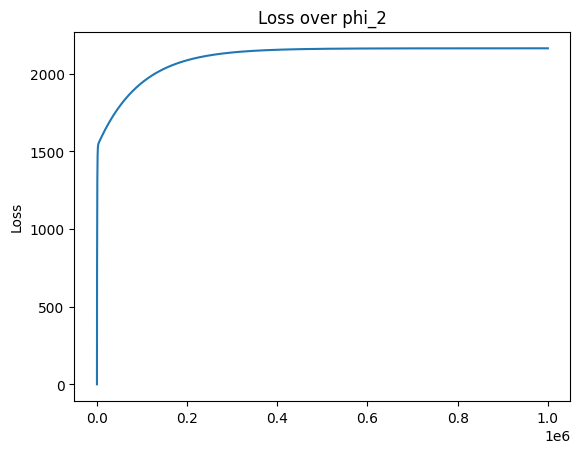

In [25]:
pp.plot(range(iterations+1), weight_history_vectors[2,0,:])
pp.xlabel('')
pp.ylabel('Loss')
pp.title('Loss over phi_2')
pp.show()